## Predict Semi-finals World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(613, 19)
(2, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-13,Argentina,Croatia,86,80,84,83,82,78,3,12,1773.88,1645.64,FIFA World Cup,Lusail,Qatar,True
1,2022-12-14,France,Morocco,86,79,82,73,82,78,4,22,1759.78,1563.50,FIFA World Cup,Al Khor,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()
scaler = StandardScaler()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = scaler.fit_transform(df_internationalmatches.iloc[:,3:].astype(float))

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = scaler.fit_transform(df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float))

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 - 120 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=X_train.shape[1], activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(10, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(y_train_predict.shape[1], activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
62/62 [==============================] - 1s 2ms/step - loss: 1.3156 - accuracy: 0.4633
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 1.2558 - accuracy: 0.5171
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 1.2354 - accuracy: 0.5383
Epoch 4/500
62/62 [==============================] - 0s 1ms/step - loss: 1.2241 - accuracy: 0.5367
Epoch 5/500
62/62 [==============================] - 0s 1ms/step - loss: 1.2168 - accuracy: 0.5400
Epoch 6/500
62/62 [==============================] - 0s 1ms/step - loss: 1.2113 - accuracy: 0.5498
Epoch 7/500
62/62 [==============================] - 0s 1ms/step - loss: 1.2055 - accuracy: 0.5514
Epoch 8/500
62/62 [==============================] - 0s 1ms/step - loss: 1.2014 - accuracy: 0.5612
Epoch 9/500
62/62 [==============================] - 0s 1ms/step - loss: 1.1972 - accuracy: 0.5481
Epoch 10/500
62/62 [==============================] - 0s 1ms/step - loss: 1.1926 - accuracy: 0.5530
Epoch 11/

62/62 [==============================] - 0s 1ms/step - loss: 1.0581 - accuracy: 0.5759
Epoch 83/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0563 - accuracy: 0.5693
Epoch 84/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0553 - accuracy: 0.5808
Epoch 85/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0533 - accuracy: 0.5677
Epoch 86/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0523 - accuracy: 0.5677
Epoch 87/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0512 - accuracy: 0.5710
Epoch 88/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0508 - accuracy: 0.5710
Epoch 89/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0498 - accuracy: 0.5710
Epoch 90/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0493 - accuracy: 0.5644
Epoch 91/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0475 - accuracy: 0.5628
Epoch 92/500


62/62 [==============================] - 0s 1ms/step - loss: 0.9950 - accuracy: 0.5840
Epoch 164/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9948 - accuracy: 0.5824
Epoch 165/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9954 - accuracy: 0.5824
Epoch 166/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9933 - accuracy: 0.5840
Epoch 167/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9945 - accuracy: 0.5824
Epoch 168/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9929 - accuracy: 0.5742
Epoch 169/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9928 - accuracy: 0.5791
Epoch 170/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9917 - accuracy: 0.5808
Epoch 171/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9907 - accuracy: 0.5873
Epoch 172/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9899 - accuracy: 0.5775
Epoc

62/62 [==============================] - 0s 2ms/step - loss: 0.9633 - accuracy: 0.5889
Epoch 245/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9625 - accuracy: 0.5873
Epoch 246/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9618 - accuracy: 0.5922
Epoch 247/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9622 - accuracy: 0.5775
Epoch 248/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.5840
Epoch 249/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.5889
Epoch 250/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9608 - accuracy: 0.5840
Epoch 251/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9622 - accuracy: 0.5873
Epoch 252/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9612 - accuracy: 0.5856
Epoch 253/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9613 - accuracy: 0.5791
Epoc

62/62 [==============================] - 0s 1ms/step - loss: 0.9468 - accuracy: 0.5856
Epoch 325/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9480 - accuracy: 0.5922
Epoch 326/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9478 - accuracy: 0.5905
Epoch 327/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9484 - accuracy: 0.5791
Epoch 328/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9464 - accuracy: 0.5856
Epoch 329/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9475 - accuracy: 0.5873
Epoch 330/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.5922
Epoch 331/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.5824
Epoch 332/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9472 - accuracy: 0.5873
Epoch 333/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9461 - accuracy: 0.5905
Epoc

62/62 [==============================] - 0s 1ms/step - loss: 0.9396 - accuracy: 0.5742
Epoch 406/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.5856
Epoch 407/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9394 - accuracy: 0.5824
Epoch 408/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9395 - accuracy: 0.5824
Epoch 409/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9395 - accuracy: 0.5889
Epoch 410/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.5856
Epoch 411/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9407 - accuracy: 0.5873
Epoch 412/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9432 - accuracy: 0.5808
Epoch 413/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9394 - accuracy: 0.5693
Epoch 414/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9395 - accuracy: 0.5840
Epoc

62/62 [==============================] - 0s 1ms/step - loss: 0.9313 - accuracy: 0.5856
Epoch 486/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9345 - accuracy: 0.5808
Epoch 487/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9317 - accuracy: 0.5759
Epoch 488/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9345 - accuracy: 0.5824
Epoch 489/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9306 - accuracy: 0.5873
Epoch 490/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.5905
Epoch 491/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9328 - accuracy: 0.5889
Epoch 492/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9318 - accuracy: 0.5954
Epoch 493/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9315 - accuracy: 0.5889
Epoch 494/500
62/62 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.5759
Epoc

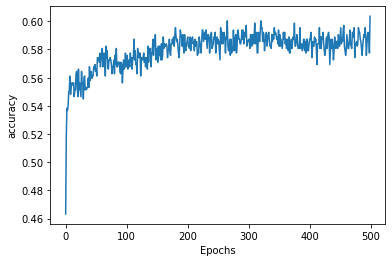

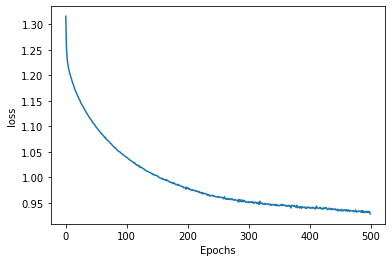

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Semi-finals World Cup 2022 Match in 90 - 120 Minutes')
print('=======================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Semi-finals World Cup 2022 Match in 90 - 120 Minutes
Argentina vs Croatia
Home Win: 0.42939  Draw: 0.44021  Away Win: 0.13041

France vs Morocco
Home Win: 0.66981  Draw: 0.16550  Away Win: 0.16469

